In [3]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve

1. Logistic Regression - using Single variable to predict class

In [4]:
penguins = sns.load_dataset('penguins')

In [5]:
penguins.species.value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [6]:
penguins.species = penguins.species.map(lambda x: 'Adelie' if x =='Adelie' else 'Other')

In [7]:
penguins.species.value_counts()

,count
species,
Other,192
Adelie,152


In [8]:
penguins.dropna(inplace=True)

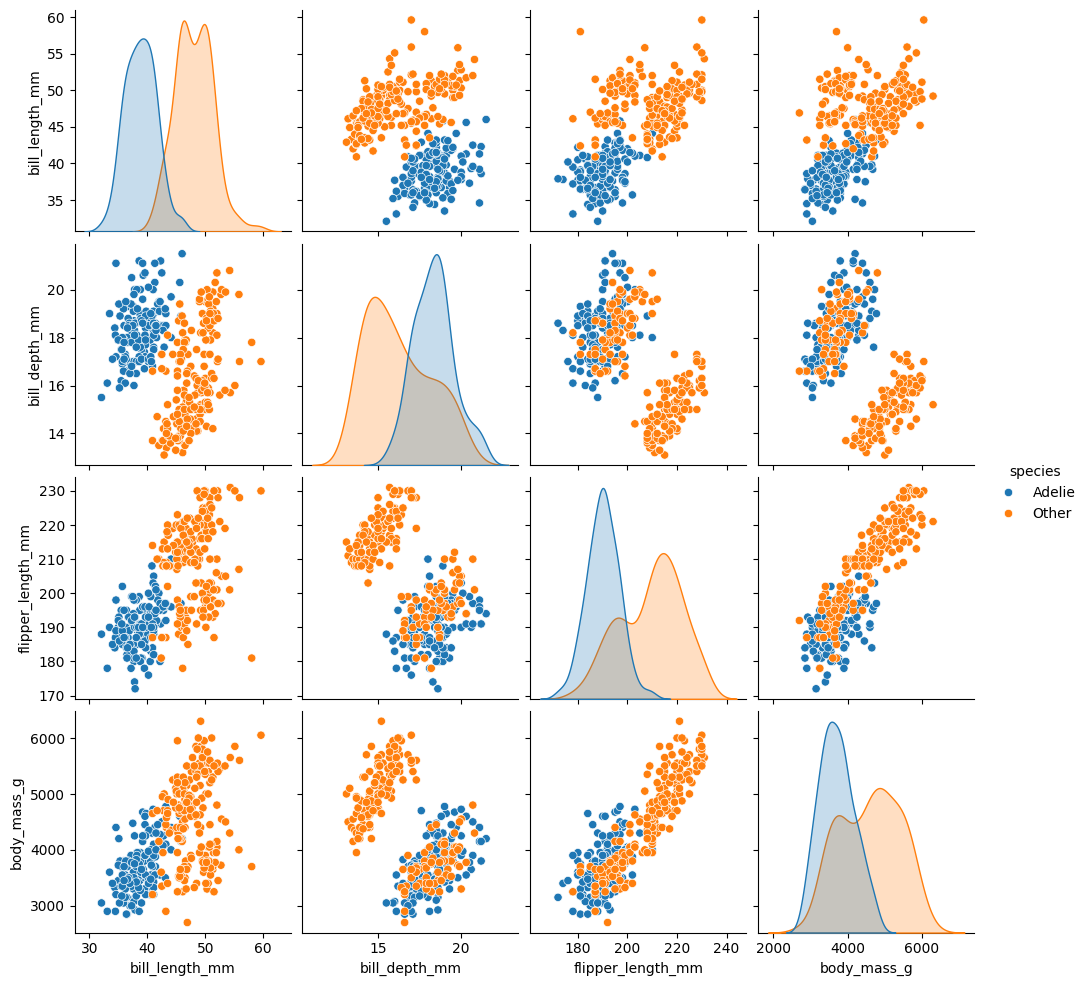

In [9]:
sns.pairplot(penguins, hue='species');

In [10]:
df = pd.get_dummies(penguins, drop_first=True, dtype=int)

In [11]:
df.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Other', 'island_Dream', 'island_Torgersen', 'sex_Male'],
      dtype='object')

In [12]:
# Define the X and y for classification. X - input and y - labels or classes
X = df[['bill_depth_mm']]
y = df['species_Other']

In [13]:
# Training and test split up. And also initializing the classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)
logistic_classifier = LogisticRegression()

In [14]:
# Train/build the model and use it for prediction
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)

In [15]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [16]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[29, 12],
       [19, 40]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65        41
           1       0.77      0.68      0.72        59

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.70      0.69      0.69       100



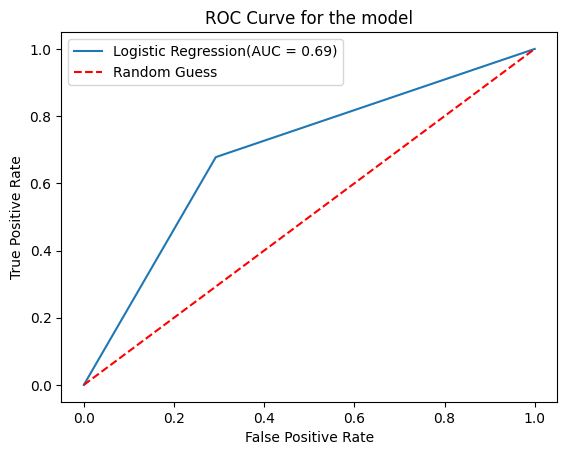

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression' f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the model')
plt.legend()
plt.show()

2. Logistic Regression using multiple features/columns of the dataset

In [19]:
X_multi = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_multi = df['species_Other']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=2024)
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred_multi = log_clf.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred_multi)

array([[41,  0],
       [ 3, 56]])

In [22]:
print(classification_report(y_test, y_pred_multi))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.95      0.97        59

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



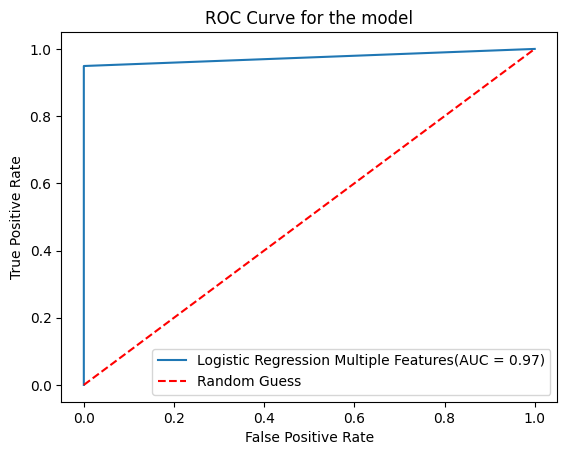

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred_multi)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression Multiple Features' f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the model')
plt.legend()
plt.show()

3. K Nearest Neighbors

1. Using a single feature , try to predict the class of a penguin.

In [24]:
X = df[['bill_depth_mm']]
y = df['species_Other']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2024)

Note: dataframe.values.flatten() is used to convert a dataframe in to 1-D array

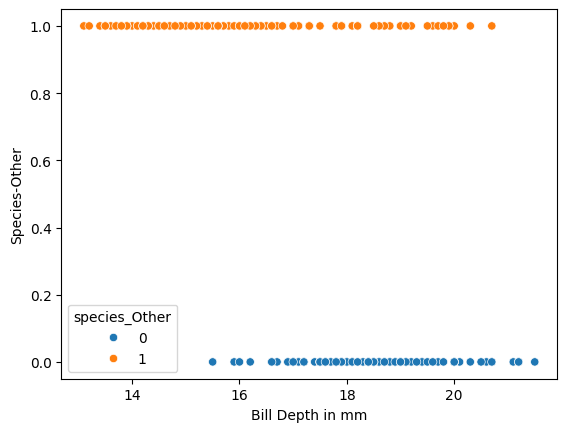

In [25]:
sns.scatterplot(x=X_train.values.flatten(),y=y_train.values.flatten(), hue=y_train)
plt.xlabel('Bill Depth in mm')
plt.ylabel('Species-Other');

In [26]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Predict the classes for Test data
y_pred_knn = neigh.predict(X_test)

In [28]:
y_pred_knn

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
# Indices and distances of neighbors in order are given. to access the Index of neighbors
neigh.kneighbors(X_test)[1]

array([[210,  94,  56],
       [ 63, 114, 125],
       [121, 228, 129],
       [ 77, 145, 151],
       [230, 175,   5],
       [115, 118,  19],
       [ 47,  68, 169],
       [201, 163, 131],
       [115, 118,  19],
       [116,  58,  80],
       [107,   3,  72],
       [ 74, 136, 152],
       [ 64,  24,  66],
       [ 39, 138, 128],
       [125, 100,  63],
       [  6, 227, 130],
       [ 25,  67,  57],
       [107,   3,  72],
       [159,  85,  28],
       [147,  14,  78],
       [217,  53, 156],
       [226,  95,  59],
       [  2,  83, 127],
       [147,  14,  78],
       [143,  36, 146],
       [ 18,  85,  28],
       [107,   3,  72],
       [180,  33,  75],
       [147,  14,  78],
       [121, 228, 129],
       [ 25,  67,  57],
       [173, 170, 182],
       [ 46,  16, 187],
       [ 64,  24,  66],
       [180,  33,  75],
       [183,  22,  26],
       [226,  95,  59],
       [ 77, 145, 151],
       [ 39, 138, 128],
       [127,  48, 209],
       [177, 214, 213],
       [111,  82

In [32]:
# Let's find the class of first 3 neighbors of the third test record. We can see that the majority class is 0
y_multi.loc[[121, 228, 129]]

,species_Other
121,0
228,1
129,0


In [33]:
y_pred_knn[2] # The majority class is predicted

0

In [34]:
confusion_matrix(y_test, y_pred_knn)

array([[30, 11],
       [20, 39]])

In [35]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        41
           1       0.78      0.66      0.72        59

    accuracy                           0.69       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.71      0.69      0.69       100



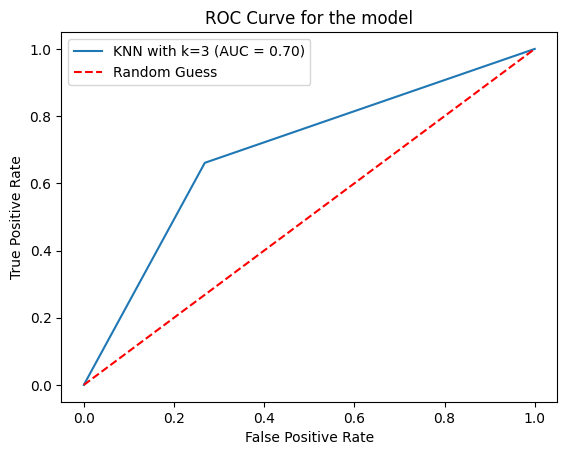

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN with k=3 ' f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the model')
plt.legend()
plt.show()

How to find the value of k?

In [37]:
# Find the sqrt of the no. of records in the training dataset

s = int(np.sqrt(len(X_train)))

# Initialize two empty dictionaries to store the k value and the corresponding accuracy scores.
kvalues_test, kvalues_train = {}, {}

# Iterate from k=1 to k = sqrt(no of records)

for k in range(1,s+1):
  neigh = KNeighborsClassifier(n_neighbors = k)
  neigh.fit(X_train, y_train)

  # Find the accuracy scores
  score1 = neigh.score(X_train, y_train)
  score2 = neigh.score(X_test, y_test)

  # Store the accuracy scores corresponding to the k value
  kvalues_train[k] = score1
  kvalues_test[k] = score2

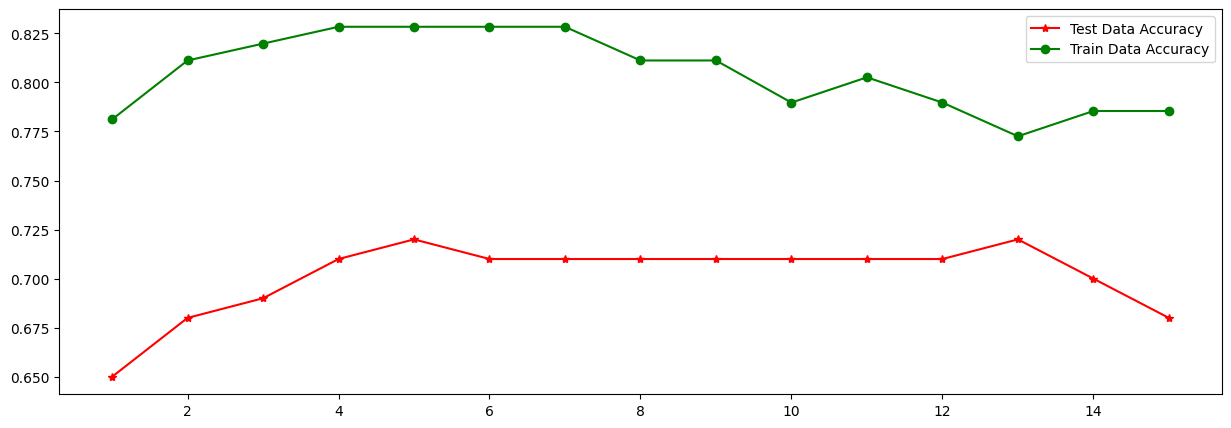

In [38]:
# Plot the k values vs accuracy scores
plt.figure(figsize=(15,5))
plt.plot(kvalues_test.keys(), kvalues_test.values(), marker='*', color='red', label='Test Data Accuracy')
plt.plot(kvalues_train.keys(), kvalues_train.values(), marker='o', color='green', label='Train Data Accuracy')
plt.legend();

Around k = 5, the accuracy for test data is improving. Then it becomes less /constant for higher values of k. Again, there's high around k =13.
We choose the lower value of k, with higher accuracy results

In [39]:
# Let's use the k = 5 value and build a model

neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        41
           1       0.84      0.64      0.73        59

    accuracy                           0.72       100
   macro avg       0.73      0.74      0.72       100
weighted avg       0.75      0.72      0.72       100



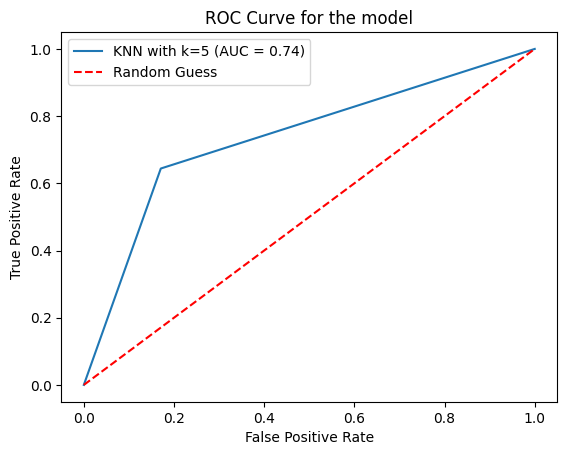

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN with k=5 ' f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the model')
plt.legend()
plt.show()

2. KNN with multiple features.
\
Let's use multiple columns to predict the class/species of a penguin

In [41]:
# Data Preparation

X_multi = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_multi = df['species_Other']

# Train Test Splitup
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=2024)

# Fit the knn classifier

multineigh = KNeighborsClassifier(n_neighbors = 5)
multineigh.fit(X_train, y_train)

# Predict the classes for test data
y_pred_knn = multineigh.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        41
           1       0.90      0.73      0.80        59

    accuracy                           0.79       100
   macro avg       0.79      0.80      0.79       100
weighted avg       0.81      0.79      0.79       100



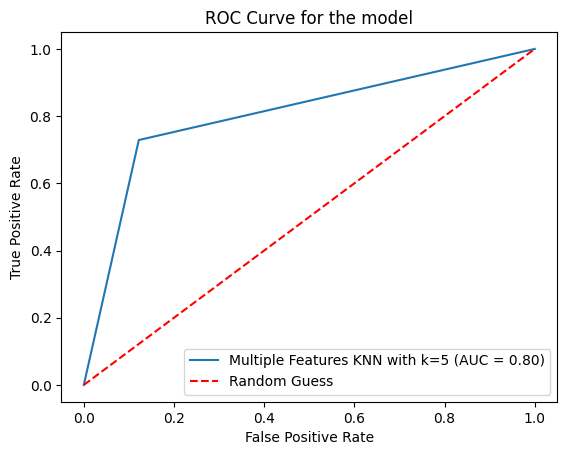

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Multiple Features KNN with k=5 ' f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the model')
plt.legend()
plt.show()

Let's find out if the k=5 value was optimal for the multiple features dataset

In [43]:
# Find the sqrt of the no. of records in the training dataset

s = int(np.sqrt(len(X_train)))

# Initialize two empty dictionaries to store the k value and the corresponding accuracy scores.

kvalues_test, kvalues_train = {}, {}

# Iterate from k=1 to k = sqrt(no of records)

for k in range(1,s+1):
  neigh = KNeighborsClassifier(n_neighbors = k)
  neigh.fit(X_train, y_train)

  # Find the accuracy scores

  score1 = neigh.score(X_train, y_train)
  score2 = neigh.score(X_test, y_test)

  # Store the accuracy scores corresponding to the k value

  kvalues_train[k] = score1
  kvalues_test[k] = score2

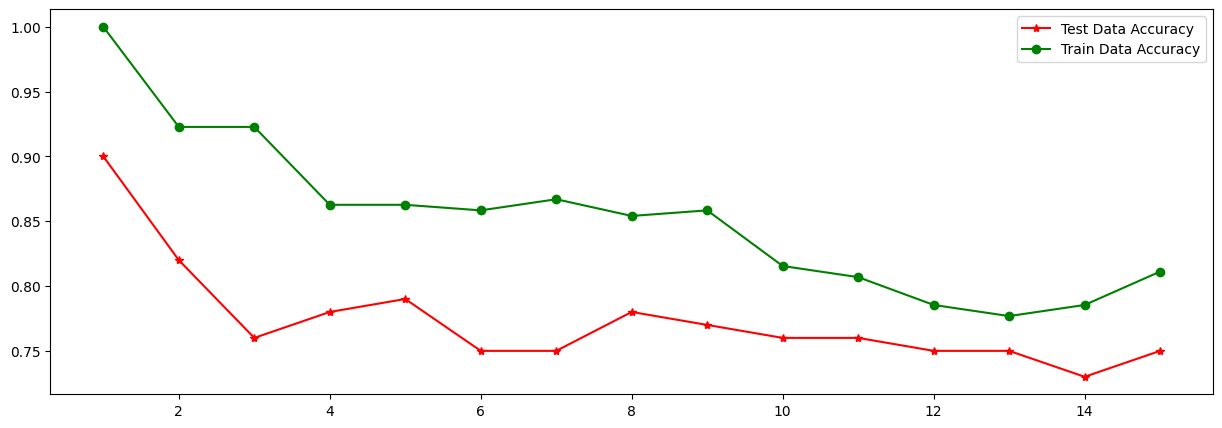

In [44]:
# Plot the k values vs Accuracy Scores
plt.figure(figsize=(15,5))
plt.plot(kvalues_test.keys(), kvalues_test.values(), marker='*', color='red', label='Test Data Accuracy')
plt.plot(kvalues_train.keys(), kvalues_train.values(), marker='o', color='green', label='Train Data Accuracy')
plt.legend();

What are your observations?

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761